In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/mental-health/mental_health.csv')

In [3]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'City', 'Program', 'Residence Type', 'Academic Pressure',
                       'Does the end of the semester affect sense of the academic pressure?', 
                       'How often you feel Academic Pressure in a running semester?', 
                       'Are you satisfied with your results each semester?', 
                       'How much academic help do you get from your friends?', 
                       'Did you receive a waiver or scholarship at your university?', 
                       'How does the lack of financial aid affect your academic performance?', 
                       'Chronic_Illness', 'Sleep Quality', 'Financial Stress', 
                       'Have you ever had suicidal thoughts ?', 'Overall Student mental Health']

In [4]:
# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [5]:
df

,Gender,Age,City,CGPA,Program,Residence Type,Academic Pressure,Does the end of the semester affect sense of the academic pressure?,How often you feel Academic Pressure in a running semester?,Are you satisfied with your results each semester?,How much academic help do you get from your friends?,Did you receive a waiver or scholarship at your university?,How does the lack of financial aid affect your academic performance?,Chronic_Illness,Sleep Duration(hours),Sleep Quality,Financial Stress,Have you ever had suicidal thoughts ?,Overall Student mental Health
0,1,20,4,3.60,5,1,2,0,1,2,0,1,2,0,5,2,0,0,1
1,0,20,4,2.77,5,1,0,0,0,1,1,0,2,0,5,2,1,0,0
2,1,19,3,3.31,1,1,1,1,0,1,2,1,0,1,5,0,0,0,2
3,0,19,5,2.78,3,1,0,0,2,1,2,0,2,0,5,0,0,0,2
4,0,20,6,3.21,5,2,0,1,2,1,1,1,1,0,8,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,0,21,10,3.36,14,2,0,0,2,2,2,1,2,0,5,0,0,0,1
1054,1,22,6,3.80,21,1,0,0,0,2,0,1,2,0,4,0,0,0,1
1055,0,21,0,3.80,3,1,1,0,1,2,1,1,0,1,7,1,1,0,2
1056,1,22,11,3.60,10,1,0,1,2,2,2,1,1,0,8,1,1,0,2


In [6]:
# Handling numerical features
numerical_features = ['Age', 'CGPA', 'Sleep Duration(hours)']

In [7]:
# Scale the numerical features
numerical_features = ['Age', 'CGPA', 'Sleep Duration(hours)']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [8]:
# Splitting the data into features (X) and target (y)
X = df.drop('Overall Student mental Health', axis=1)  # Drop target variable from features
y = df['Overall Student mental Health']  # Target variable

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Logistic Regression with Regularization
log_reg_model = LogisticRegression(C=1)  # Regularization parameter
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8066
[[44  0  7]
 [ 0 54 16]
 [ 8 10 73]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        51
           1       0.84      0.77      0.81        70
           2       0.76      0.80      0.78        91

    accuracy                           0.81       212
   macro avg       0.82      0.81      0.81       212
weighted avg       0.81      0.81      0.81       212



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


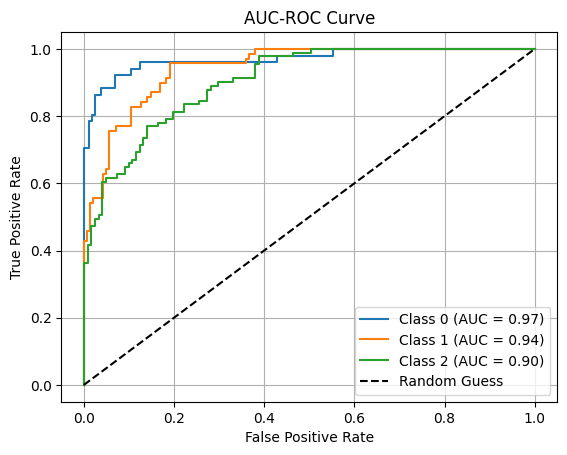

In [56]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = log_reg_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

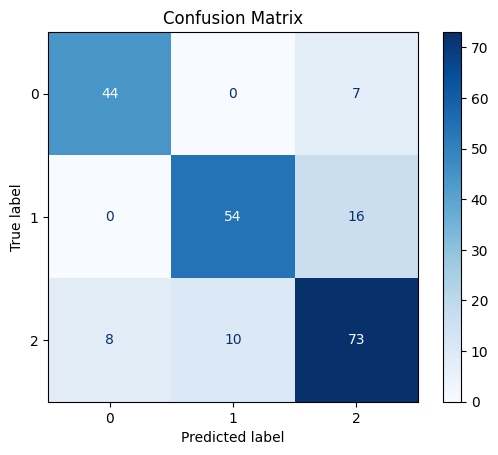

In [38]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_log_reg)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Random Forest with limited tree depth
rf_model = RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=5)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9811
[[49  0  2]
 [ 0 70  0]
 [ 0  2 89]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        51
           1       0.97      1.00      0.99        70
           2       0.98      0.98      0.98        91

    accuracy                           0.98       212
   macro avg       0.98      0.98      0.98       212
weighted avg       0.98      0.98      0.98       212



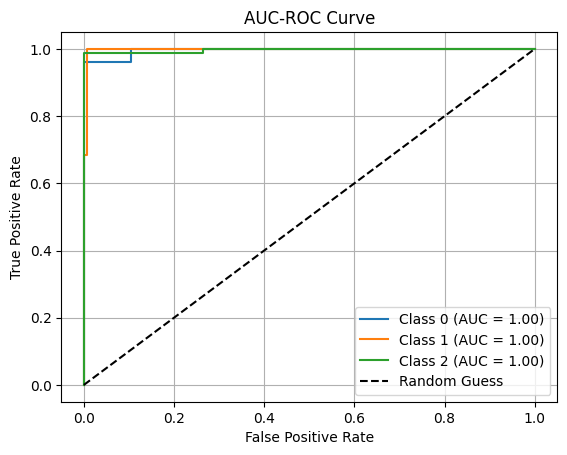

In [55]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = rf_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

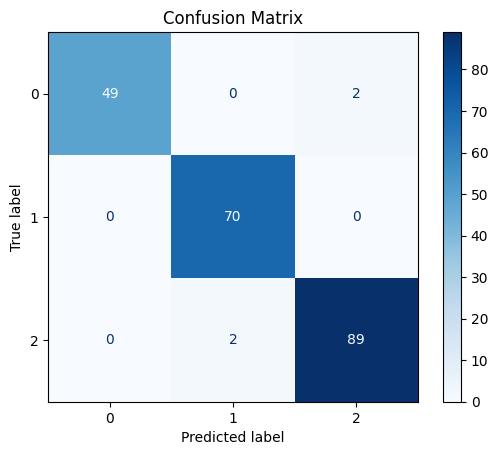

In [37]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [12]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Output Results
print("SVM Accuracy:", accuracy_svm)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.839622641509434
[[46  0  5]
 [ 0 59 11]
 [ 5 13 73]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        51
           1       0.82      0.84      0.83        70
           2       0.82      0.80      0.81        91

    accuracy                           0.84       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.84      0.84      0.84       212



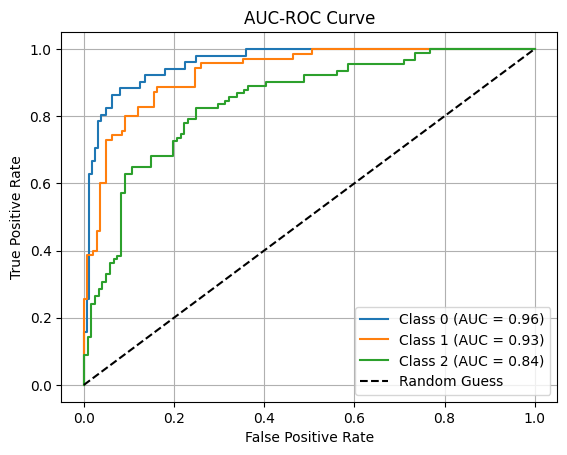

In [57]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
svm_model = SVC(probability=True)  # Must be set before fitting the model
svm_model.fit(X_train, y_train)

# Binarize labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = svm_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

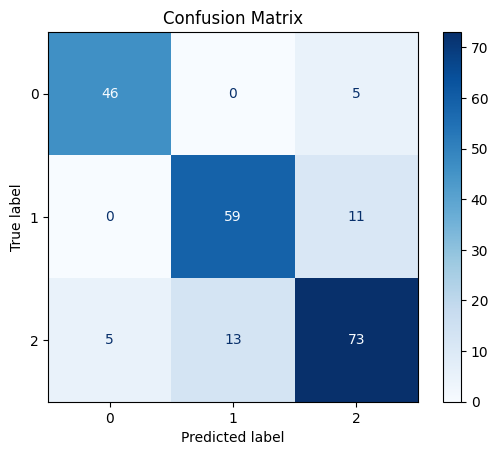

In [36]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_svm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [13]:
# Gradient Boosting with Early Stopping
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=5)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Output Results
print("Gradient Boosting Accuracy:", accuracy_gb)
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9858490566037735
[[51  0  0]
 [ 0 69  1]
 [ 1  1 89]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.99      0.99      0.99        70
           2       0.99      0.98      0.98        91

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



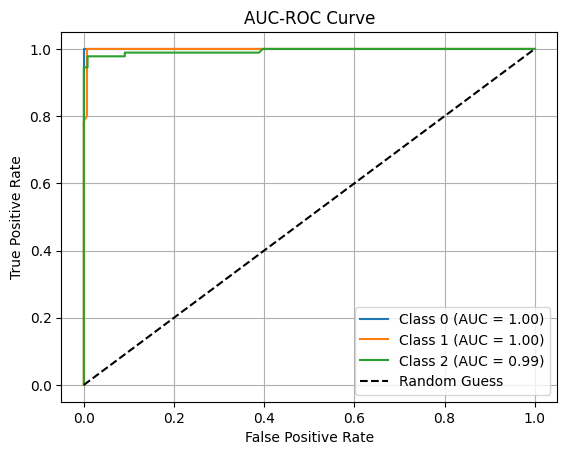

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = gb_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

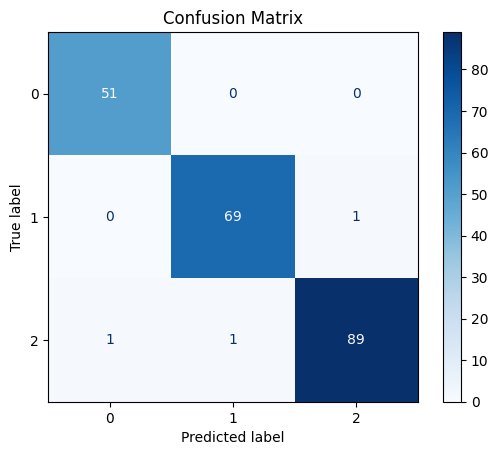

In [35]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Output Results
print("KNN Accuracy:", accuracy_knn)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8537735849056604
[[46  2  3]
 [ 2 58 10]
 [ 6  8 77]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        51
           1       0.85      0.83      0.84        70
           2       0.86      0.85      0.85        91

    accuracy                           0.85       212
   macro avg       0.85      0.86      0.86       212
weighted avg       0.85      0.85      0.85       212



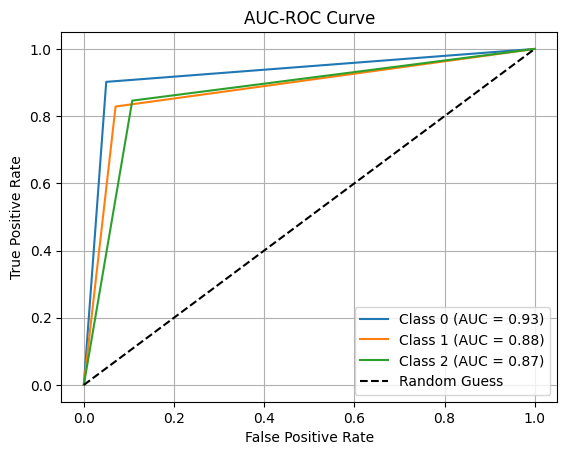

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = knn_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

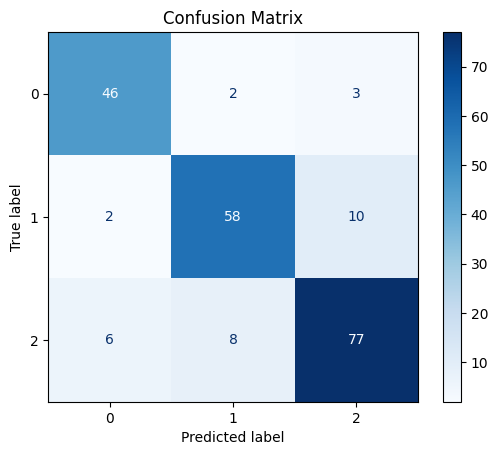

In [34]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Output Results
print("Decision Tree Accuracy:", accuracy_dt)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9905660377358491
[[51  0  0]
 [ 0 70  0]
 [ 0  2 89]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.97      1.00      0.99        70
           2       1.00      0.98      0.99        91

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



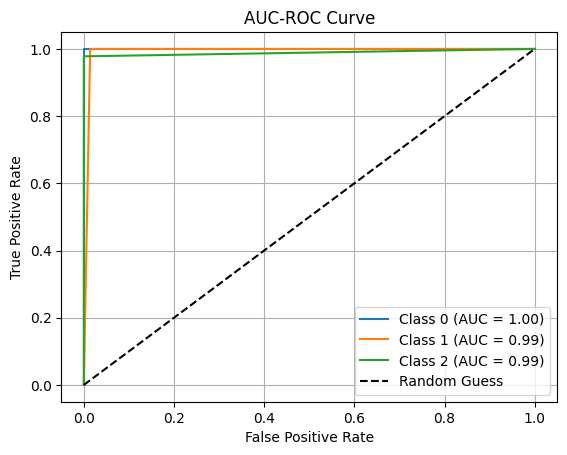

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = dt_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

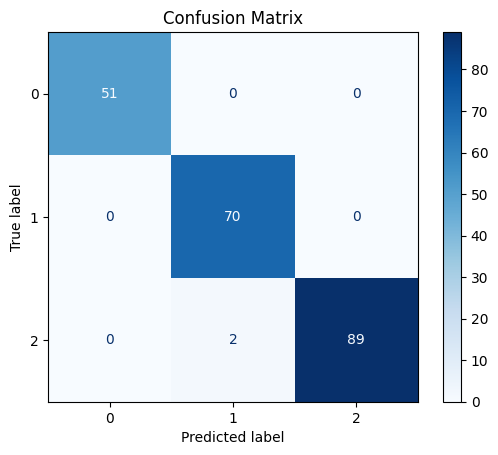

In [33]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [16]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost with Learning Rate
ada_model = AdaBoostClassifier(n_estimators=1000, learning_rate=0.01, random_state=5)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Output Results
print("AdaBoost Accuracy:", accuracy_ada)
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 0.7688679245283019
[[36  0 15]
 [ 0 50 20]
 [ 1 13 77]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82        51
           1       0.79      0.71      0.75        70
           2       0.69      0.85      0.76        91

    accuracy                           0.77       212
   macro avg       0.82      0.76      0.78       212
weighted avg       0.79      0.77      0.77       212



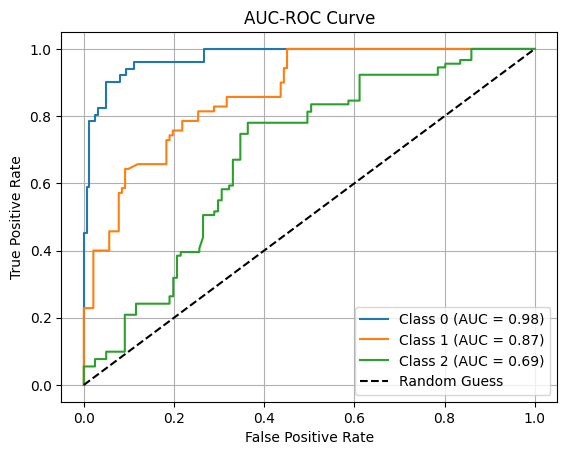

In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = ada_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

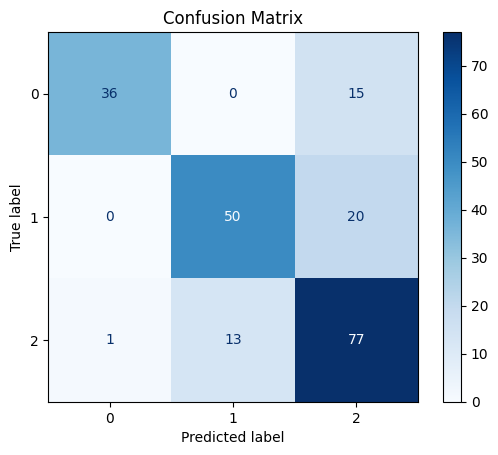

In [32]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_ada)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [17]:
import xgboost as xgb

# Train XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Output Results
print("XGBoost Accuracy:", accuracy_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9905660377358491
[[51  0  0]
 [ 0 70  0]
 [ 0  2 89]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.97      1.00      0.99        70
           2       1.00      0.98      0.99        91

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



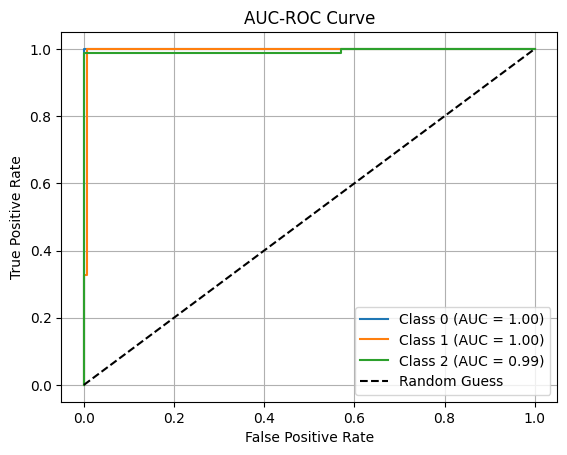

In [42]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = xgb_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

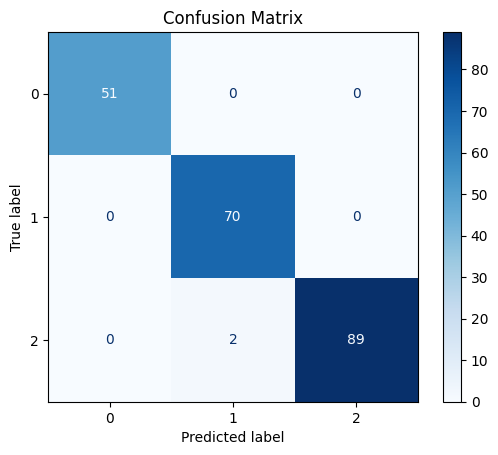

In [31]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [18]:
import lightgbm as lgb

# LightGBM with Learning Rate
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=5)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)


# Output Results
print("LightGBM Accuracy:", accuracy_lgb)
print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 846, number of used features: 18
[LightGBM] [Info] Start training from score -1.328873
[LightGBM] [Info] Start training from score -1.074093
[LightGBM] [Info] Start training from score -0.932377
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

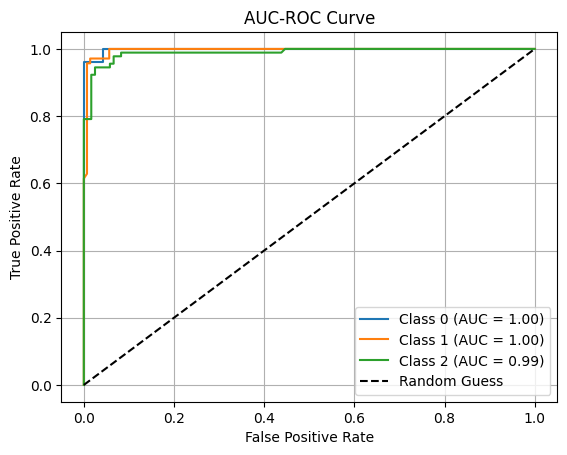

In [41]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = lgb_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

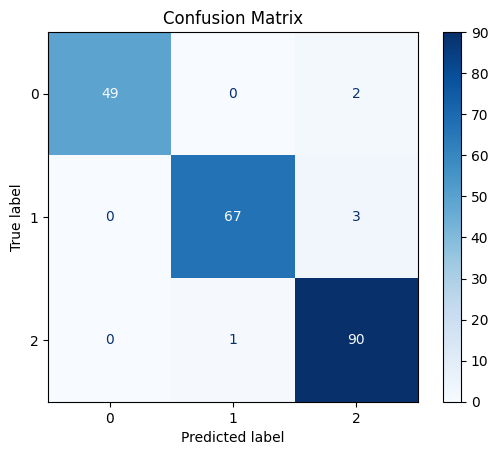

In [30]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [19]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Output Results
print("Naive Bayes Accuracy:", accuracy_gnb)
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))


Naive Bayes Accuracy: 0.7924528301886793
[[41  2  8]
 [ 0 61  9]
 [11 14 66]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        51
           1       0.79      0.87      0.83        70
           2       0.80      0.73      0.76        91

    accuracy                           0.79       212
   macro avg       0.79      0.80      0.79       212
weighted avg       0.79      0.79      0.79       212



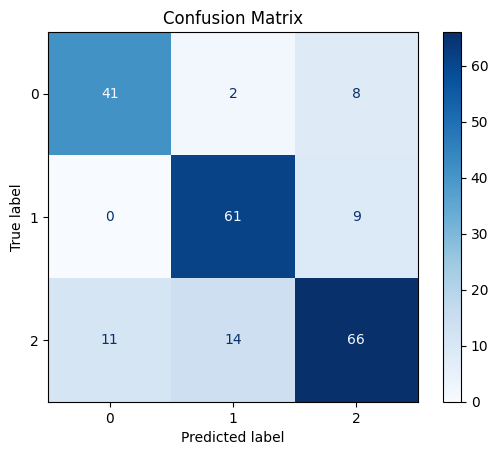

In [29]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gnb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

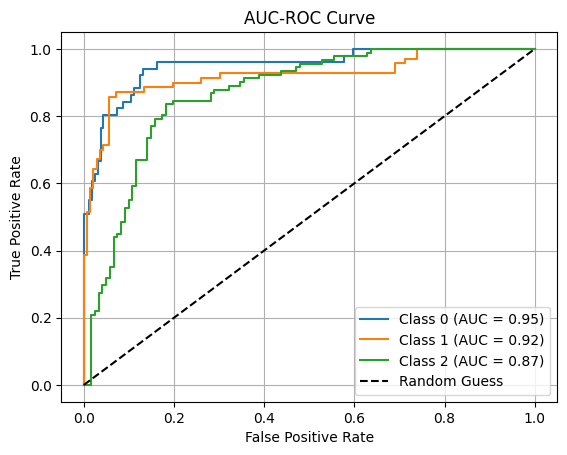

In [40]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize labels for multi-class AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = gnb_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # assuming 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


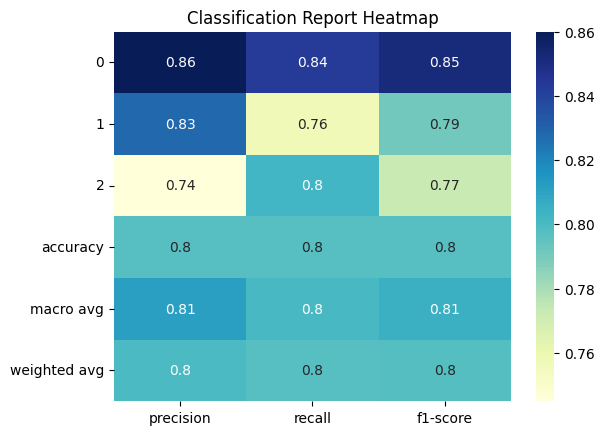

In [39]:
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).iloc[:-1, :].T  # skip accuracy row
sns.heatmap(df, annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()

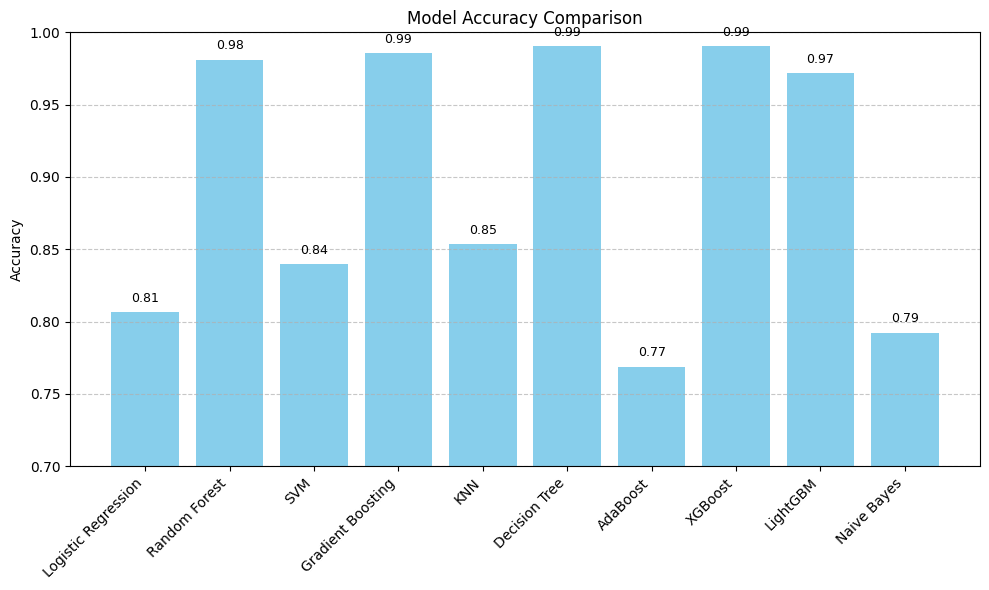

In [58]:
import matplotlib.pyplot as plt

# Define models and their accuracies (taken from your output.txt)
models = [
    "Logistic Regression", "Random Forest", "SVM", "Gradient Boosting", "KNN",
    "Decision Tree", "AdaBoost", "XGBoost", "LightGBM", "Naive Bayes"
]
accuracies = [
    0.8066, 0.9811, 0.8396, 0.9858, 0.8538,
    0.9906, 0.7689, 0.9906, 0.9717, 0.7925
]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 1.0)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f"{acc:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
